### Import Packages

In [1]:
import os
import sys

# !pip install xarray
# !pip install netcdf4
# !pip install scipy

import numpy as np
import pandas as pd
from datetime import datetime
import pdb
import xarray as xr
import matplotlib.pyplot as plt
import puv

import solo

sys.path.append(r'c:\checkouts\python\TUD-COASTAL\python')

In [2]:
dataFolder="ps_data/atm_pressure_removed/"

ds01 = xr.open_dataset(dataFolder+"ps1.nc")
ds02 = xr.open_dataset(dataFolder+"ps2.nc")
ds03 = xr.open_dataset(dataFolder+"ps3.nc")
ds04 = xr.open_dataset(dataFolder+"ps4.nc")
ds05 = xr.open_dataset(dataFolder+"ps5.nc")
ds06 = xr.open_dataset(dataFolder+"ps6.nc")

fs1234 = ds01.sf.values
fs56   = ds05.sf.values

rho_seawater = 1035  # kg/m3
g = 9.81  # m/s2

fresolution = 0.03125  # frequency resolution in fourier space
# fresolution = 0.02

In [3]:
time1 = ds01.t.values
time2 = ds02.t.values
time3 = ds03.t.values
time4 = ds04.t.values
time5 = ds05.t.values
time6 = ds06.t.values
# print(time6)

### Remove dry data
Remove dry data based on the standard deviation of the dataset (considering bursts of data).

In [4]:
# remove all bursts where instrument fell dry

std_min = 70

ds01['p'] = ds01.p.where(ds01.p.std(dim='N') > std_min)
ds02['p'] = ds02.p.where(ds02.p.std(dim='N') > std_min)
ds03['p'] = ds03.p.where(ds03.p.std(dim='N') > std_min)
ds04['p'] = ds04.p.where(ds04.p.std(dim='N') > std_min)
ds05['p'] = ds05.p.where(ds05.p.std(dim='N') > std_min)
ds06['p'] = ds06.p.where(ds06.p.std(dim='N') > std_min)

### Remove NAN values
Remove the bursts with only NAN values

In [5]:
ds01 = ds01.dropna(dim='t')
ds02 = ds02.dropna(dim='t')
ds03 = ds03.dropna(dim='t')
ds04 = ds04.dropna(dim='t')
ds05 = ds05.dropna(dim='t')
ds06 = ds06.dropna(dim='t')

### Extract sampling frequency
Extract sampling frequency as explicit variable.

In [6]:
# make a new dataset that has an extra dimension to accomodate for the frequency axis
ds1 = xr.Dataset(data_vars={},
                 coords={'t': ds01.t.values,
                         'N': ds01.N.values,
                         'f': np.arange(0, ds01.sf.values / 2, fresolution)})
ds1['f'].attrs = {'units': 'Hz'}
ds1.attrs = ds01.attrs

# put all variables in this new dataset
for key in ds01.data_vars:
    ds1[key] = ds01[key]
    
# extract sampling frequency as explicit variable
sf = ds1.f.values

In [7]:
# make a new dataset that has an extra dimension to accomodate for the frequency axis
ds2 = xr.Dataset(data_vars={},
                 coords={'t': ds02.t.values,
                         'N': ds02.N.values,
                         'f': np.arange(0, ds02.sf.values / 2, fresolution)})
ds2['f'].attrs = {'units': 'Hz'}
ds2.attrs = ds02.attrs

# put all variables in this new dataset
for key in ds02.data_vars:
    ds2[key] = ds02[key]
    
# extract sampling frequency as explicit variable
sf = ds2.f.values

In [8]:
# make a new dataset that has an extra dimension to accomodate for the frequency axis
ds3 = xr.Dataset(data_vars={},
                 coords={'t': ds03.t.values,
                         'N': ds03.N.values,
                         'f': np.arange(0, ds03.sf.values / 2, fresolution)})
ds3['f'].attrs = {'units': 'Hz'}
ds3.attrs = ds03.attrs

# put all variables in this new dataset
for key in ds03.data_vars:
    ds3[key] = ds03[key]
    
# extract sampling frequency as explicit variable
sf = ds3.f.values

In [9]:
# make a new dataset that has an extra dimension to accomodate for the frequency axis
ds4 = xr.Dataset(data_vars={},
                 coords={'t': ds04.t.values,
                         'N': ds04.N.values,
                         'f': np.arange(0, ds04.sf.values / 2, fresolution)})
ds4['f'].attrs = {'units': 'Hz'}
ds4.attrs = ds04.attrs

# put all variables in this new dataset
for key in ds04.data_vars:
    ds4[key] = ds04[key]
    
# extract sampling frequency as explicit variable
sf = ds4.f.values

In [10]:
# make a new dataset that has an extra dimension to accomodate for the frequency axis
ds5 = xr.Dataset(data_vars={},
                 coords={'t': ds05.t.values,
                         'N': ds05.N.values,
                         'f': np.arange(0, ds05.sf.values / 2, fresolution)})
ds5['f'].attrs = {'units': 'Hz'}
ds5.attrs = ds05.attrs

# put all variables in this new dataset
for key in ds05.data_vars:
    ds5[key] = ds05[key]
    
# extract sampling frequency as explicit variable
sf = ds5.f.values

In [11]:
# make a new dataset that has an extra dimension to accomodate for the frequency axis
ds6 = xr.Dataset(data_vars={},
                 coords={'t': ds06.t.values,
                         'N': ds06.N.values,
                         'f': np.arange(0, ds06.sf.values / 2, fresolution)})
ds6['f'].attrs = {'units': 'Hz'}
ds6.attrs = ds06.attrs

# put all variables in this new dataset
for key in ds06.data_vars:
    ds6[key] = ds06[key]
    
# extract sampling frequency as explicit variable
sf = ds6.f.values

### Compute water depth
Compute water depth using the mean value for the pressure / (rho g) plus the measured distance to bed.

In [12]:
# compute water depth
ds1['h'] = (ds1['p']/rho_seawater/g + ds1['zi'] - ds1['zb']).mean(dim='N') #* 1.1
ds1['h'].attrs = {'long_name': 'mean water level', 'units': 'm+NAP'}

ds2['h'] = (ds2['p']/rho_seawater/g + ds2['zi'] - ds2['zb']).mean(dim='N') #* 1.1
ds2['h'].attrs = {'long_name': 'mean water level', 'units': 'm+NAP'}

ds3['h'] = (ds3['p']/rho_seawater/g + ds3['zi'] - ds3['zb']).mean(dim='N') #* 1.1
ds3['h'].attrs = {'long_name': 'mean water level', 'units': 'm+NAP'}

ds4['h'] = (ds4['p']/rho_seawater/g + ds4['zi'] - ds4['zb']).mean(dim='N') #* 1.1
ds4['h'].attrs = {'long_name': 'mean water level', 'units': 'm+NAP'}

ds5['h'] = (ds5['p']/rho_seawater/g + ds5['zi'] - ds5['zb']).mean(dim='N') #* 1.1
ds5['h'].attrs = {'long_name': 'mean water level', 'units': 'm+NAP'}

ds6['h'] = (ds6['p']/rho_seawater/g + ds6['zi'] - ds6['zb']).mean(dim='N') #* 1.1
ds6['h'].attrs = {'long_name': 'mean water level', 'units': 'm+NAP'}


ds1['zi'] = ds1['zi'].mean(dim='N')
ds1['zb'] = ds1['zb'].mean(dim='N')

ds2['zi'] = ds2['zi'].mean(dim='N')
ds2['zb'] = ds2['zb'].mean(dim='N')

ds3['zi'] = ds3['zi'].mean(dim='N')
ds3['zb'] = ds3['zb'].mean(dim='N')

ds4['zi'] = ds4['zi'].mean(dim='N')
ds4['zb'] = ds4['zb'].mean(dim='N')

ds5['zi'] = ds5['zi'].mean(dim='N')
ds5['zb'] = ds5['zb'].mean(dim='N')

ds6['zi'] = ds6['zi'].mean(dim='N')
ds6['zb'] = ds6['zb'].mean(dim='N')

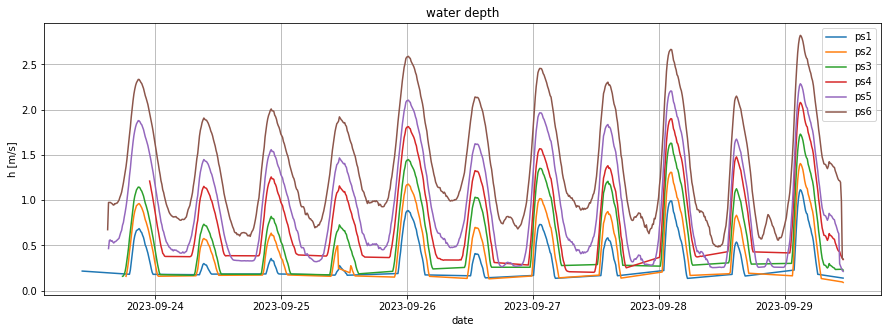

In [13]:
fig, ax = plt.subplots(figsize=(15,5))

ax.set_title('water depth')

ax.plot(ds1.t, ds1.h, label='ps1')
ax.plot(ds2.t, ds2.h, label='ps2')
ax.plot(ds3.t, ds3.h, label='ps3')
ax.plot(ds4.t, ds4.h, label='ps4')
ax.plot(ds5.t, ds5.h, label='ps5')
ax.plot(ds6.t, ds6.h, label='ps6')

ax.grid()

ax.set_xlabel('date')
ax.set_ylabel('h [m/s]')

ax.legend(loc='best')

plt.savefig('figures/water_depths.png', bbox_inches='tight')

### Compute wave statistics based on pressure
We use Fourier transforms to convert the pressure signal to a pressure density spectrum. Using the dispersion relation in combination with the equation for p_wave as a function of the surface elevation, a transfer function is determined. This transfer function is used to convert to a wave spectrum. The wave spectrum can be converted back to a time series using the phases found with the fft. In order to remove energy from very high frequencies, a cutoff frequency is used.

In [14]:
def wave_stats(ds, fresolution=fresolution):
    """Calculates wave statistics, which are automatically added to the dataset, and adds relevant attributes"""

    # %% do several wave statistics computations, only based on pressure
    ufunc = lambda x, h, zi, zb: puv.attenuation_corrected_wave_spectrum(
        'pressure',
        ds.sf.values, x, h,
        zi,
        zb,
        fresolution=fresolution)

    fx, ds['vy'] = xr.apply_ufunc(ufunc,
                                  ds['p'], ds['h'], ds['zi'], ds['zb'],
                                  input_core_dims=[['N'], [], [], []],
                                  output_core_dims=[['f'], ['f']],
                                  vectorize=True)
    ds['vy'].attrs = {'units': 'm2/Hz', 'long_name': 'spectral density'}

    ufunc = lambda vy: puv.get_peak_frequency(ds.f.values, vy)
    ds['fp'] = xr.apply_ufunc(ufunc,
                              ds['vy'],
                              input_core_dims=[['f']],
                              output_core_dims=[[]],
                              vectorize=True)

    ufunc = lambda vy, fp: puv.compute_wave_params(ds.f.values, vy, fmin=0.5 * fp, fmax=5)
    ds['Hm0'], ds['Tp'], ds['Tm01'], ds['Tm02'], ds['Tmm10'], ds['Tps'] = xr.apply_ufunc(ufunc,
                                                                              ds['vy'], ds['fp'],
                                                                              input_core_dims=[['f'], []],
                                                                              output_core_dims=[[], [], [], [], [], []],
                                                                              vectorize=True)
    ds['Hm0'].attrs = {'units': 'm', 'long_name': 'significant wave height',
                       'computation': 'computed between fmin=0.5fp and fmax=5'}
    ds['Tp'].attrs = {'units': 's', 'long_name': 'peak wave period',
                      'computation': 'computed between fmin=0.5fp and fmax=5'}
    ds['Tm01'].attrs = {'units': 's', 'long_name': 'mean wave period',
                        'computation': 'computed between fmin=0.5fp and fmax=5'}
    ds['Tm02'].attrs = {'units': 's', 'long_name': 'mean wave period',
                        'computation': 'computed between fmin=0.5fp and fmax=5'}
    ds['Tmm10'].attrs = {'units': 's', 'long_name': 'Tm-1,0',
                         'computation': 'computed between fmin=0.5fp and fmax=5'}
    ds['Tps'].attrs = {'units': 's', 'long_name': 'peak wave period',
                       'computation':'computed between fmin=0.5fp and fmax=5', 
                       'comment':'smoothed estimate from the discrete spectrum'}
    
wave_stats(ds1)
wave_stats(ds2)
wave_stats(ds3)
wave_stats(ds4)
wave_stats(ds5)
wave_stats(ds6)

C:\Users\khdeb\Documents\Mijn Documenten\School\Universiteit\Civiele Techniek\MSc\Year 2\Q1\Hydraulics Fieldwork\Fieldwork Directory\pressureProcessing\puv.py:345: RuntimeWarning: overflow encountered in cosh
  Sw = np.cosh(k*h)/np.cosh(k*elev)


### GoPro Data available
Adds a column to the dataset that shows whether or not GoPro data is available for each burst of data.

In [15]:
timeslots = pd.read_csv('GoProRecordingTimes.txt', delimiter='; ', skiprows=2)

for i in timeslots.index.values:
    timeslots.iloc[i]['starttime'] = np.datetime64(datetime.strptime(timeslots.iloc[i]['Date'] + ' ' + timeslots.iloc[i]['starttime'] \
                                                       + ':00', '%d-%m-%Y %H:%M:%S'))
    timeslots.iloc[i]['endtime'] = np.datetime64(datetime.strptime(timeslots.iloc[i]['Date'] + ' ' + timeslots.iloc[i]['endtime'] \
                                                       + ':00', '%d-%m-%Y %H:%M:%S'))
timeslots.drop(['Date'], axis=1, inplace=True)
display(timeslots)

bands = []

for (starttime, endtime) in zip(timeslots['starttime'], timeslots['endtime']):
    bands.append((starttime, endtime))
    
bands = bands[3:]    
    
def gopro_available(ds, timeslots):
    """
    Takes ds as argument, and checks for each burst of data in dataset whether or not the begin and endtime are within
    one of the GoPro timeslots.
    """

    GoProAvailable = np.zeros(len(ds.t.values))
    i = 0    

    for ts in ds.t.values:
        c = 0

        for starttime, endtime in bands:
            if (ts > starttime) and (ts < endtime):
                c += 1

        if c > 0:
            GoProAvailable[i] = True
        else:
            GoProAvailable[i] = False

        i += 1

    ds = ds.assign({"GoProAvailable":(['t'], GoProAvailable)})
    
    ds['GoProAvailable'].attrs = {'units': '-', 'long_name': 'Is GoPro data available for this timeslot (1 means yes)'}    
    return ds

ds1 = gopro_available(ds1, bands)
ds2 = gopro_available(ds2, bands)
ds3 = gopro_available(ds3, bands)
ds4 = gopro_available(ds4, bands)
ds5 = gopro_available(ds5, bands)
ds6 = gopro_available(ds6, bands)

timeslots.to_csv('timeslots_GoPro')

C:\Users\khdeb\Anaconda3\envs\notebook1\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


,starttime,endtime,comment
0,2023-09-23T16:51:00.000000,2023-09-23T18:10:00.000000,video form
1,2023-09-24T11:45:00.000000,2023-09-24T12:12:00.000000,"fish eye (overheated, shut down)"
2,2023-09-24T20:41:00.000000,2023-09-24T20:50:00.000000,linear view testing
3,2023-09-25T10:46:00.000000,2023-09-25T13:47:00.000000,swell
4,2023-09-26T11:49:00.000000,2023-09-26T16:19:00.000000,"swell, clear image of good quality"
5,2023-09-27T13:11:00.000000,2023-09-27T16:36:00.000000,-
6,2023-09-28T14:06:00.000000,2023-09-28T16:26:00.000000,-


### Write new dataset to file
We strip all information on burst scale from the dataset to reduce size (and this info is already present in the raw_netcdf version of the data)

In [16]:
# we strip all information on burst scale from the dataset to reduce size 
# (and this info is already present in the raw_netcdf version of the data)
ncOutFile = "ps_data/tailored/"

ds1Tailored = ds1.drop_dims('N')
ds1Tailored.to_netcdf(ncOutFile + f'{ds1.instrument}' + '.nc')

ds2Tailored = ds2.drop_dims('N')
ds2Tailored.to_netcdf(ncOutFile + f'{ds2.instrument}' + '.nc')

ds3Tailored = ds3.drop_dims('N')
ds3Tailored.to_netcdf(ncOutFile +  f'{ds3.instrument}' + '.nc')

ds4Tailored = ds4.drop_dims('N')
ds4Tailored.to_netcdf(ncOutFile + f'{ds4.instrument}' + '.nc')

ds5Tailored = ds5.drop_dims('N')
ds5Tailored.to_netcdf(ncOutFile + f'{ds5.instrument}' + '.nc')

ds6Tailored = ds6.drop_dims('N')
ds6Tailored.to_netcdf(ncOutFile + f'{ds6.instrument}' + '.nc')

### Time for some plotting

In [17]:
def get_Hm0_with_NAN(time, dsTailored):


    new_time = []
    psHm0 = []
    
    for i in time:
        new_time.append(i)
        if i in dsTailored.t.values:
            psHm0.append(np.float64(dsTailored.Hm0.sel(t=i).values))
        else:
            psHm0.append(np.NAN)

    return new_time, psHm0


new_time1, ps1Hm0 = get_Hm0_with_NAN(time1, ds1Tailored)
new_time2, ps2Hm0 = get_Hm0_with_NAN(time2, ds2Tailored)
new_time3, ps3Hm0 = get_Hm0_with_NAN(time3, ds3Tailored)
new_time4, ps4Hm0 = get_Hm0_with_NAN(time4, ds4Tailored)
new_time5, ps5Hm0 = get_Hm0_with_NAN(time5, ds5Tailored)
new_time6, ps6Hm0 = get_Hm0_with_NAN(time6, ds6Tailored)

In [18]:
# print(new_time)
# print(ds1Tailored.t.values)
# print(ps1Hm0)

# print(ps6Hm0)

# print(time6)
# print(ds6Tailored.t.values)

# print(type(new_time[0]))
# print(type(ds1Tailored.t.values[0]))

In [19]:
# Compare to data from RWS

RWS_data1 = pd.read_csv('offshore_waveheights_rws/20231025_068.csv', delimiter=';')

RWS_data2 = pd.DataFrame()

RWS_data2['t'] = RWS_data1['WAARNEMINGDATUM'] + ' ' + RWS_data1['WAARNEMINGTIJD (MET/CET)']
RWS_data2['t'] = pd.to_datetime(RWS_data2['t'], dayfirst=True)

RWS_data2['Hs'] = RWS_data1['NUMERIEKEWAARDE'] / 100

RWS_data2 = RWS_data2[RWS_data2.Hs < 10**3]
RWS_data2 = RWS_data2[RWS_data2.t > ds6.t.values.min()]
RWS_data2 = RWS_data2[RWS_data2.t < ds6.t.values.max()]


# datetime.strptime('2023-09-23 00:00:00', '%Y-%m-%d %H:%M:%S')

RWS_data2.head()

,t,Hs
523,2023-09-23 15:10:00,1.12
524,2023-09-23 15:20:00,1.11
525,2023-09-23 15:30:00,1.12
526,2023-09-23 15:40:00,1.15
527,2023-09-23 15:50:00,1.17


In [20]:
# Compare to data from wave buoy
buoy_data = pd.read_csv('offshore_waveheights_buoy/SPOT-1620_2023-09-25_2023-09-30_download.csv', delimiter=',')

t = []

for i in buoy_data.index:
    t.append(datetime.fromtimestamp(buoy_data['Epoch Time'][i]))

buoy_data['t'] = t

buoy_data2 = pd.DataFrame()
buoy_data2['t'] = buoy_data['t']
buoy_data2['Hs'] = buoy_data['Significant Wave Height (m)']

buoy_data2 = buoy_data2[buoy_data2.Hs != '-']

buoy_data2['Hs'] = np.float64(buoy_data2['Hs'])
buoy_data2 = buoy_data2[buoy_data2.t > ds6.t.values.min()]
buoy_data2 = buoy_data2[buoy_data2.t < ds6.t.values.max()]

buoy_data2.sort_values(by='t', inplace=True)

tmin = datetime.strptime('2023-09-28 00:00:00', '%Y-%m-%d %H:%M:%S')
tmax = datetime.strptime('2023-09-28 10:00:00', '%Y-%m-%d %H:%M:%S')

buoy_data3 = buoy_data2[buoy_data2.t > tmin]
buoy_data3 = buoy_data3[buoy_data3.t < tmax]

display(buoy_data3)

,t,Hs
98,2023-09-28 00:44:25,0.24
94,2023-09-28 01:44:25,1.29
96,2023-09-28 02:44:25,1.97
92,2023-09-28 03:44:25,0.88
90,2023-09-28 04:44:25,0.67
88,2023-09-28 05:44:25,1.49
86,2023-09-28 06:44:25,1.17
84,2023-09-28 07:44:25,1.18
82,2023-09-28 08:44:25,1.34
80,2023-09-28 09:44:25,1.38


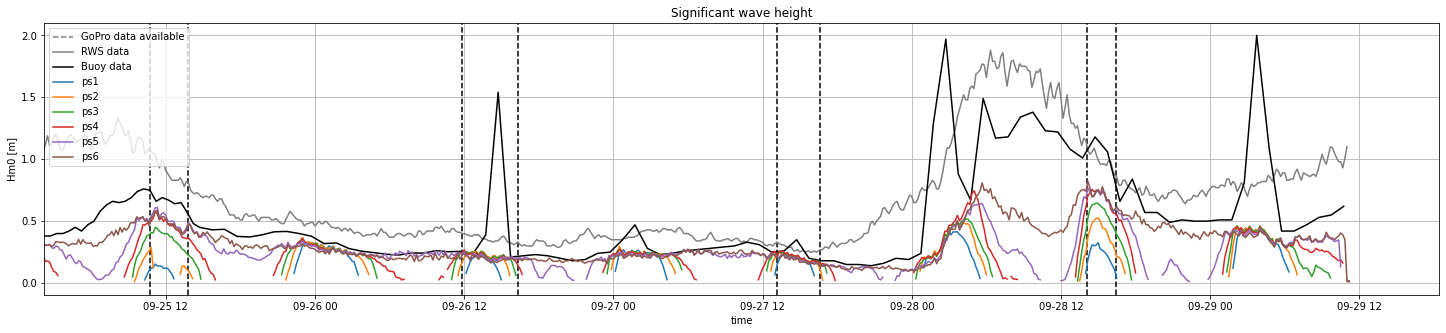

In [21]:
from matplotlib.patches import Patch

fig, ax = plt.subplots(figsize=(25,5))

for starttime, endtime in bands:
    ax.axvline((starttime), 0, 1, ls='--', color='k')
    ax.axvline((endtime), 0, 1, ls='--', color='k')
    
ax.plot([],[], color='gray', linestyle='--', label='GoPro data available')

ax.plot(RWS_data2.t, RWS_data2.Hs, color='gray', label='RWS data')
ax.plot(buoy_data2.t, buoy_data2.Hs, color='k', label='Buoy data')

ax.plot(new_time1, ps1Hm0, label=ds1.instrument)
ax.plot(new_time2, ps2Hm0, label=ds2.instrument)
ax.plot(new_time3, ps3Hm0, label=ds3.instrument)
ax.plot(new_time4, ps4Hm0, label=ds4.instrument)
ax.plot(new_time5, ps5Hm0, label=ds5.instrument)
ax.plot(new_time6, ps6Hm0, label=ds6.instrument)

ax.set_xlabel('time')
ax.set_ylabel('Hm0 [m]')

ax.set_title('Significant wave height')

ax.set_xlim(left=buoy_data2.t.min())

ax.grid()

ax.legend(loc='upper left')

SMALL_SIZE = 16
MEDIUM_SIZE = 20
BIGGER_SIZE = 25

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.savefig('figures/Hm0.png', bbox_inches='tight')

plt.savefig('figures/Hm0_comparison.png', bbox_inches='tight', facecolor='white', transparent=False)

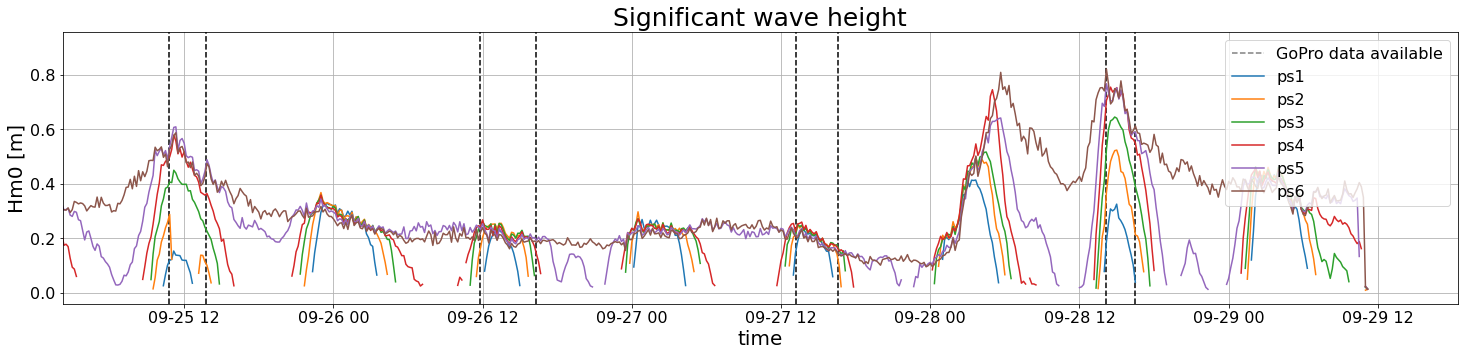

In [22]:
from matplotlib.patches import Patch

fig, ax = plt.subplots(figsize=(25,5))

for starttime, endtime in bands:
    ax.axvline((starttime), 0, 1, ls='--', color='k')
    ax.axvline((endtime), 0, 1, ls='--', color='k')
    
ax.plot([],[], color='gray', linestyle='--', label='GoPro data available')

ax.plot(new_time1, ps1Hm0, label=ds1.instrument)
ax.plot(new_time2, ps2Hm0, label=ds2.instrument)
ax.plot(new_time3, ps3Hm0, label=ds3.instrument)
ax.plot(new_time4, ps4Hm0, label=ds4.instrument)
ax.plot(new_time5, ps5Hm0, label=ds5.instrument)
ax.plot(new_time6, ps6Hm0, label=ds6.instrument)

ax.set_xlabel('time')
ax.set_ylabel('Hm0 [m]')


ax.set_title('Significant wave height')

ax.set_xlim(left=buoy_data2.t.min())

ax.grid()

ax.legend(loc='upper right')

SMALL_SIZE = 16
MEDIUM_SIZE = 20
BIGGER_SIZE = 25

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.savefig('figures/Hm0.png', bbox_inches='tight', facecolor='white', transparent=False)

In [23]:
# print(ds1Tailored.Hm0.isnull().sum())
# print(ds2Tailored.Hm0.isnull().sum())
# print(ds3Tailored.Hm0.isnull().sum())

# display(ds1Tailored)

# display((ds1.p.values < 0).sum())
# display((ds2.p.values<0).sum())

# print((ds1.h.values < 0).sum())

# print((ds2.h.values < 0).sum())

# print(ds1.zi.mean())
# print(ds1.zb.mean())

# print(ds2.zi.mean())
# print(ds2.zb.mean())

# plt.plot(ds1.t, ds1.h)
# plt.plot(ds2.t, ds2.h)

In [24]:
# display(ds02)
# display(ds2)

# print(ds1.Hm0.isnull().sum())
# print(ds2.Hm0.isnull().sum())
# print(ds3.Hm0.isnull().sum())
# print(ds4.Hm0.isnull().sum())
# print(ds5.Hm0.isnull().sum())
# print(ds6.Hm0.isnull().sum())

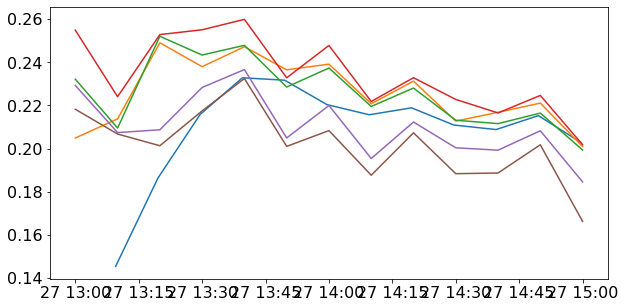

In [25]:
tmin1 = datetime.strptime('2023-09-27 13:00:00', '%Y-%m-%d %H:%M:%S')
tmax1 = datetime.strptime('2023-09-27 15:00:00', '%Y-%m-%d %H:%M:%S')

dse1 = ds1.sel(t=slice(tmin1, tmax1))
dse2 = ds2.sel(t=slice(tmin1, tmax1))
dse3 = ds3.sel(t=slice(tmin1, tmax1))
dse4 = ds4.sel(t=slice(tmin1, tmax1))
dse5 = ds5.sel(t=slice(tmin1, tmax1))
dse6 = ds6.sel(t=slice(tmin1, tmax1))


plt.figure(figsize=(10, 5))
plt.plot(dse1.t, dse1.Hm0)
plt.plot(dse2.t, dse2.Hm0)
plt.plot(dse3.t, dse3.Hm0)
plt.plot(dse4.t, dse4.Hm0)
plt.plot(dse5.t, dse5.Hm0)
plt.plot(dse6.t, dse6.Hm0)

### Swell/storm waves result

In [26]:
display(ds6)

<xarray.Dataset>
Dimensions:         (f: 256, t: 842, N: 9600)
Coordinates:
  * f               (f) float64 0.0 0.03125 0.0625 0.09375 ... 7.906 7.938 7.969
  * t               (t) datetime64[ns] 2023-09-23T15:00:00 ... 2023-09-29T11:...
  * N               (N) float64 0.0 0.0625 0.125 0.1875 ... 599.8 599.9 599.9
Data variables: (12/15)
    p               (t, N) float64 188.9 179.9 175.9 ... -93.78 -91.92 -90.06
    zi              (t) float64 -1.05 -1.05 -1.05 -1.05 ... -1.05 -1.05 -1.05
    zb              (t) float64 -1.35 -1.35 -1.35 -1.35 ... -1.391 -1.392 -1.393
    sf              float64 16.0
    name            object ...
    h               (t) float64 0.6734 0.974 0.9742 ... 0.9919 0.3593 0.3466
    ...              ...
    Tp              (t) float64 16.0 5.333 10.67 5.333 ... 5.333 5.333 16.0 16.0
    Tm01            (t) float64 3.897 2.299 2.592 2.329 ... 3.519 7.356 5.868
    Tm02            (t) float64 2.818 1.964 2.144 2.003 ... 3.118 5.001 4.185
    Tmm10           (t) float64 7.161 3.308 4.285 3.284 ... 4.178 11.63 9.393
    Tps             (t) float64 16.0 5.271 10.08 5.412 ... 5.202 5.152 16.0 16.0
    GoProAvailable  (t) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Attributes: (12/16)
    Conventions:               CF-1.6
    name:                      ps6
    instrument:                ps6
    instrument type:           Ruskin RBR Solo
    instrument serial number:  208682
    epsg:                      28992
    ...                        ...
    summary:                   Hydraulic fieldwork pressure data, with pressu...
    contact person:            Marlies van der Lugt
    emailadres:                m.a.vanderlugt@tudelft.nl
    construction datetime:     10-Nov-2023 (15:14:23)
    version:                   v1
    version comments:          constructed with xarray

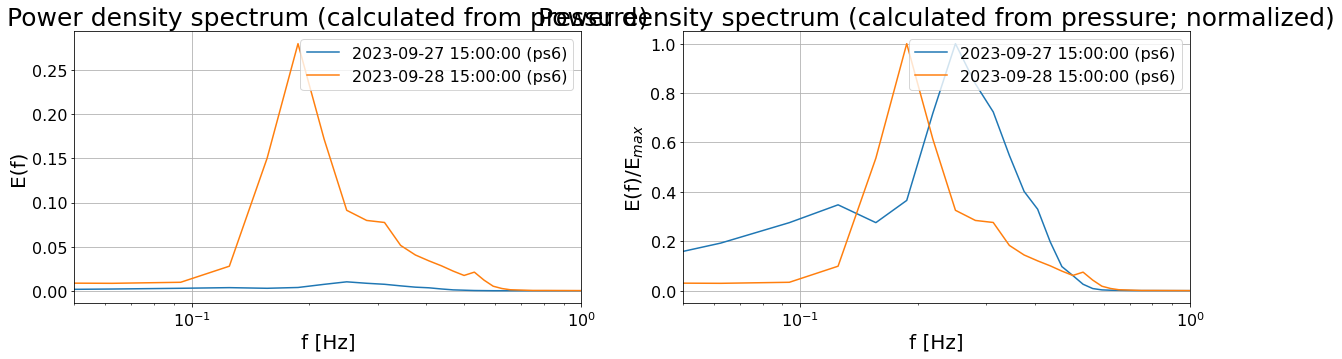

In [27]:
tswell = datetime.strptime('2023-09-27 15:00:00', '%Y-%m-%d %H:%M:%S')
tstorm = datetime.strptime('2023-09-28 15:00:00', '%Y-%m-%d %H:%M:%S')

fig, ax = plt.subplots(1, 2, figsize=(20,  5))

f_swell  = ds6.f
vy_swell = ds6.vy.sel(t=tswell)
f_storm  = ds6.f
vy_storm = ds6.vy.sel(t=tstorm)

ax[0].plot(f_swell, vy_swell, label=f"{tswell} ({ds6.instrument})")
ax[0].plot(f_storm, vy_storm, label=f"{tstorm} ({ds6.instrument})")

ax[1].plot(f_swell, vy_swell/vy_swell.max(), label=f"{tswell} ({ds6.instrument})")
ax[1].plot(f_storm, vy_storm/vy_storm.max(), label=f"{tstorm} ({ds6.instrument})")

ax[0].set_xscale('log')
ax[1].set_xscale('log')

ax[0].set_xlim(left = 0.05, right=1)
ax[1].set_xlim(left = 0.05, right=1)

ax[0].set_xlabel('f [Hz]')
ax[0].set_ylabel('E(f)')

ax[1].set_xlabel('f [Hz]')
ax[1].set_ylabel('E(f)/E$_{max}$')

ax[0].set_title('Power density spectrum (calculated from pressure)')
ax[1].set_title('Power density spectrum (calculated from pressure; normalized)')

ax[0].grid()
ax[1].grid()

ax[0].legend(loc='upper right')
ax[1].legend(loc='upper right')

SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 14

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.savefig('figures/power_density_spectrum.png', bbox_inches='tight', facecolor='white', transparent=False)

,# STN,YYYYMMDD,H,DD,FH,t
39,330,20230923,16,270,80,2023-09-23 16:00:00
40,330,20230923,17,260,70,2023-09-23 17:00:00
41,330,20230923,18,250,60,2023-09-23 18:00:00
42,330,20230923,19,240,50,2023-09-23 19:00:00
43,330,20230923,20,230,40,2023-09-23 20:00:00
...,...,...,...,...,...,...
174,330,20230929,7,200,60,2023-09-29 07:00:00
175,330,20230929,8,200,60,2023-09-29 08:00:00
176,330,20230929,9,220,70,2023-09-29 09:00:00
177,330,20230929,10,310,80,2023-09-29 10:00:00


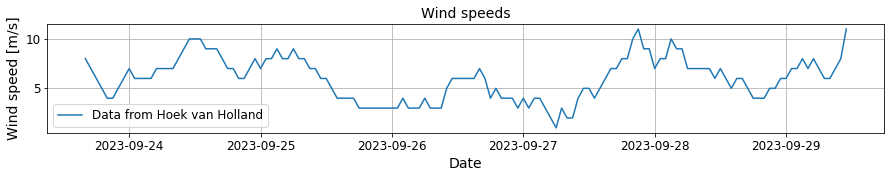

In [28]:
# from KNMI_readers import load_uurgeg_from_knmi

# # Compare to data from wave buoy

# data = load_uurgeg_from_knmi('wind_data_knmi/wind data.txt', variables = 'all')
wind_data = pd.read_csv('wind_data_knmi/wind data.txt', delimiter=',', skiprows=9, skipinitialspace=True, dtype=int)

# display(wind_data)

# print(wind_data['YYYYMMDD'].values)

# wind_data['t'] = datetime.strptime(str(wind_data['YYYYMMDD'].values) + ' ' + str(wind_data['H'].values), '%Y%m%d %H')


date = wind_data['YYYYMMDD'].values

years = []
months= []
days =  []

for i in range(len(date)):
    years.append(int(str(date[i])[:4]))
    months.append(int(str(date[i])[4:6]))
    days.append(int(str(date[i])[6:8]))

hours = wind_data['H'].values

for i in range(len(hours)):
    if hours[i] == 24:
        hours[i] = 0
        if days[i] != 30:
            days[i]+= 1
        else:
            months[i] += 1
            days[i] = 1


        
t = [datetime(year = years[i], month=months[i], day=days[i], hour=hours[i]) for i in range(len(years))]

wind_data['t'] = t

wind_data = wind_data[wind_data.t > ds6.t.values.min()]
wind_data = wind_data[wind_data.t < ds6.t.values.max()]

display(wind_data)

fig, ax = plt.subplots(figsize=(15, 2))

# ax[0].plot(wind_data['t'], wind_data['DD'])
# ax[0].hlines(y=[270, 180], xmin=wind_data['t'].min(), xmax=wind_data['t'].max(), color='k')

ax.set_title('Wind speeds')
ax.set_xlabel('Date')
ax.set_ylabel('Wind speed [m/s]')
ax.plot(wind_data['t'], wind_data['FH'] * 0.1, label='Data from Hoek van Holland')
ax.legend()
ax.grid()

SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.savefig('figures/wind_speeds.png', bbox_inches='tight', facecolor='white', transparent=False)